In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Reading data in the system
reviews_df = pd.read_csv('amazon_vfl_reviews.csv')
reviews_df.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...


In [3]:
reviews_df.shape

(2782, 5)

In [4]:
# any null columns
reviews_df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    4
dtype: int64

In [5]:
# the review column, four rows without review text, we drop the rows with the null columns
reviews_df = reviews_df.dropna()
#resetting the index
reviews_df = reviews_df.reset_index(drop=True)
# any null columns
reviews_df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    0
dtype: int64

In [6]:
reviews_df['brandName'] = reviews_df['name'].str.split('-').str[0]
reviews_df.brandName.unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'PATANJALI', 'Dettol', 'Savlon', 'Cinthol', 'Britannia',
       'NutriChoice', 'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack',
       'Reflex', 'MYSORE', 'Mysore'], dtype=object)

# Ploting Graph

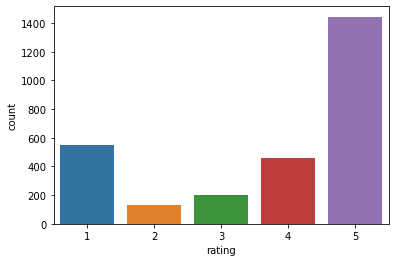

In [7]:
import seaborn as sns
sns.countplot(x='rating', data=reviews_df)


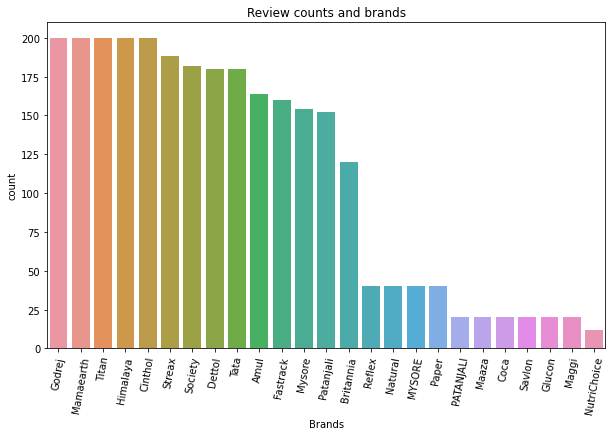

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(reviews_df['brandName'].value_counts()[
            :25].index, reviews_df['brandName'].value_counts()[:25].values)
plt.title('Review counts and brands')
plt.xlabel('Brands')
plt.ylabel('count')
plt.xticks(rotation=80)
plt.show()


In [9]:
import re
# remove all characters not number or characters
def cleanText(input_string):
    modified_string = re.sub('[^A-Za-z0-9]+', ' ', input_string)
    return(modified_string)
reviews_df['review'] = reviews_df.review.apply(cleanText)
reviews_df['review'][150]

'I am writing this review after using it around 20 days It seems very natural and chemical free and is very gentle on skin But it does its job of cleaning the skin properly It contains tea tree which is one of my favourite ingredients for skin care Give it a try its definitely better than all other chemicals containing face washes And its even affordable as compared to other natural brands available in market '

In [10]:
# From the name we extract the brand
reviews_df['brandName'] = reviews_df['name'].str.split('-').str[0]
reviews_df.head()

,asin,name,date,rating,review,brandName
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product My hair falling increase too mu...,Mamaearth
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth


In [11]:
reviews_df['brandName'].value_counts()

Godrej         200
Mamaearth      200
Titan          200
Himalaya       200
Cinthol        200
Streax         188
Society        182
Dettol         180
Tata           180
Amul           164
Fastrack       160
Mysore         154
Patanjali      152
Britannia      120
Reflex          40
Natural         40
MYSORE          40
Paper           40
PATANJALI       20
Maaza           20
Coca            20
Savlon          20
Glucon          20
Maggi           20
NutriChoice     12
Indiana          6
Name: brandName, dtype: int64

In [12]:
reviews_df['brandName'] = reviews_df['brandName'].str.title()
reviews_df.brandName.unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'Dettol', 'Savlon', 'Cinthol', 'Britannia', 'Nutrichoice',
       'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack', 'Reflex',
       'Mysore'], dtype=object)

In [13]:
# Extracting the product from the name column
products = []
for value in reviews_df['name']:
    indx = len(value.split('-')[0])+1
    products.append(value[indx:])
reviews_df['product'] = products
reviews_df['product'].unique()

array(['Onion-Growth-Control-Redensyl',
       'Percent-Natural-Berry-Toothpaste',
       'Natural-Turmeric-Saffron-brightning',
       'Illuminate-Vitamin-Radiant-Turmeric',
       'Blemishes-Pigmentation-Blemish-Mulberry', 'Face-Wash-100-ml',
       'Moisturizing-Baby-Bathing-Oatmeal',
       'Protekt-Master-Blaster-Handwash', 'No-1-Bathing-Soap-Lime',
       'No-1-Bathing-Soap-Turmeric', 'Direct-Cool-Refrigerator-1905-PTDI',
       'aer-Pocket-Bathroom-Fragrance',
       'Security-Solutions-SEEC9060-Electronic',
       'Matic-Spray-Violet-Valley',
       'Security-Solutions-Goldilocks-Personal',
       'ViroShield-Disinfecting-VIROSHIELD-30UV',
       'Analog-Black-Dial-Watch-1805NM01',
       'Analog-White-Dial-Watch-NK1639SL03',
       'Karishma-Analog-Blue-Watch-1774SM01',
       'Karishma-Analog-Black-Watch-NK1639SM02',
       'Octane-Analog-Silver-Watch-NK1650BM03',
       'Analog-Black-Dial-Watch-NK1730SL02',
       'Karishma-Analog-Champagne-Watch-NK1580YL05',
       'Analog-

In [14]:
reviews_df.head()

,asin,name,date,rating,review,brandName,product
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth,Onion-Growth-Control-Redensyl
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,Onion-Growth-Control-Redensyl
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product My hair falling increase too mu...,Mamaearth,Onion-Growth-Control-Redensyl
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth,Onion-Growth-Control-Redensyl
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth,Onion-Growth-Control-Redensyl


Text analysis with NLTK and Vader Sentiment analyzer

In [15]:
#converting to lower case
reviews_df['clean_review_text']=reviews_df['review'].str.lower()

In [16]:
import string
#removing punctuations
reviews_df['clean_review_text']=reviews_df['clean_review_text'].str.translate(str.maketrans('','',string.punctuation))

In [17]:
import nltk
from nltk.corpus import stopwords
stopWords=stopwords.words('english')+['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']
def removeStopWords(stopWords, rvw_txt):
    newtxt = ' '.join([word for word in rvw_txt.split() if word not in stopWords])
    return newtxt
reviews_df['clean_review_text'] = [removeStopWords(stopWords,x) for x in reviews_df['clean_review_text']]

In [18]:
import nltk
nltk.download('punkt')


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [19]:
from nltk.tokenize import word_tokenize
#splitting text into words
tokenList=[]
for indx in range(len(reviews_df)):
       token=word_tokenize(reviews_df['clean_review_text'][indx])
       tokenList.append(token)
reviews_df['review_tokens'] = tokenList
reviews_df.head()

,asin,name,date,rating,review,brandName,product,clean_review_text,review_tokens
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth,Onion-Growth-Control-Redensyl,bought hair oil viewing many good comments pro...,"[bought, hair, oil, viewing, many, good, comme..."
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,Onion-Growth-Control-Redensyl,used mama earth newly launched onion oil twice...,"[used, mama, earth, newly, launched, onion, oi..."
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product My hair falling increase too mu...,Mamaearth,Onion-Growth-Control-Redensyl,bad product hair falling increase much order s...,"[bad, product, hair, falling, increase, much, ..."
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth,Onion-Growth-Control-Redensyl,product smells similar navarathna hair oil str...,"[product, smells, similar, navarathna, hair, o..."
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth,Onion-Growth-Control-Redensyl,trying different onion oil hair hair healthy p...,"[trying, different, onion, oil, hair, hair, he..."


In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiment_model = SentimentIntensityAnalyzer()
sentiment_scores=[]
sentiment_score_flag = []
for text in reviews_df['clean_review_text']:
        sentimentResults = sentiment_model.polarity_scores(text)
        sentiment_score = sentimentResults["compound"]
        #print(sentimentResults)
        #The compound value reflects the overall sentiment ranging from -1 being very negative and +1 being very positive.
        sentiment_scores.append(sentiment_score)
        # marking the sentiments as positive, negative and neutral 
        if sentimentResults['compound'] >= 0.05 : 
            sentiment_score_flag.append('positive')
  
        elif sentimentResults['compound'] <= - 0.05 : 
            sentiment_score_flag.append('negative')
  
        else : 
            sentiment_score_flag.append('neutral')
            
reviews_df['scores']=sentiment_scores
reviews_df['scoreStatus'] = sentiment_score_flag

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [21]:
reviews_df.head()

,asin,name,date,rating,review,brandName,product,clean_review_text,review_tokens,scores,scoreStatus
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth,Onion-Growth-Control-Redensyl,bought hair oil viewing many good comments pro...,"[bought, hair, oil, viewing, many, good, comme...",0.7037,positive
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,Onion-Growth-Control-Redensyl,used mama earth newly launched onion oil twice...,"[used, mama, earth, newly, launched, onion, oi...",0.8689,positive
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product My hair falling increase too mu...,Mamaearth,Onion-Growth-Control-Redensyl,bad product hair falling increase much order s...,"[bad, product, hair, falling, increase, much, ...",-0.6820,negative
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth,Onion-Growth-Control-Redensyl,product smells similar navarathna hair oil str...,"[product, smells, similar, navarathna, hair, o...",-0.2732,negative
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth,Onion-Growth-Control-Redensyl,trying different onion oil hair hair healthy p...,"[trying, different, onion, oil, hair, hair, he...",0.9286,positive


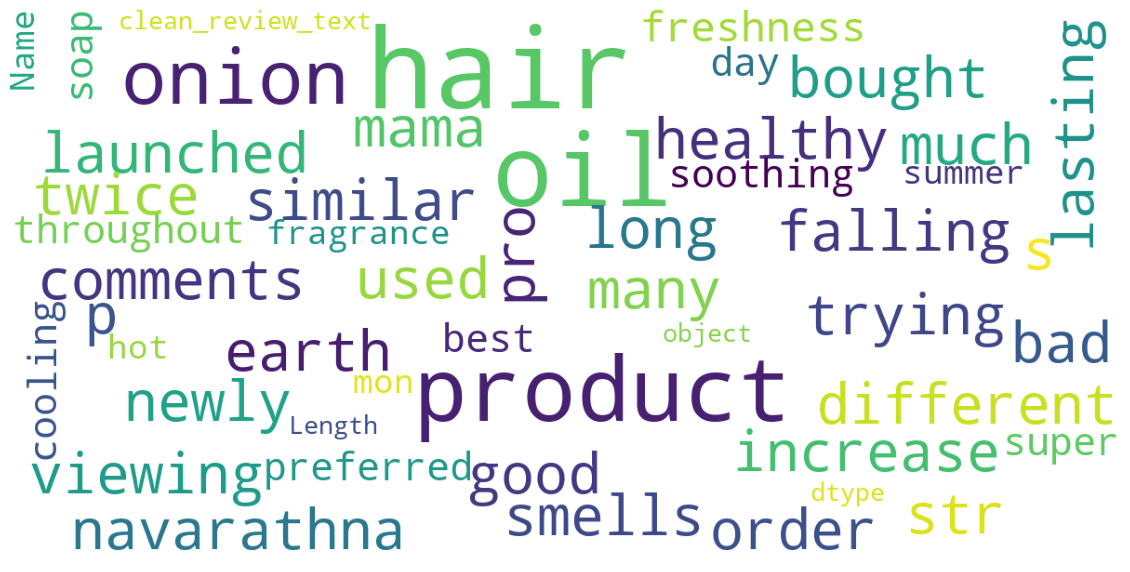

In [22]:
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["clean_review_text"])

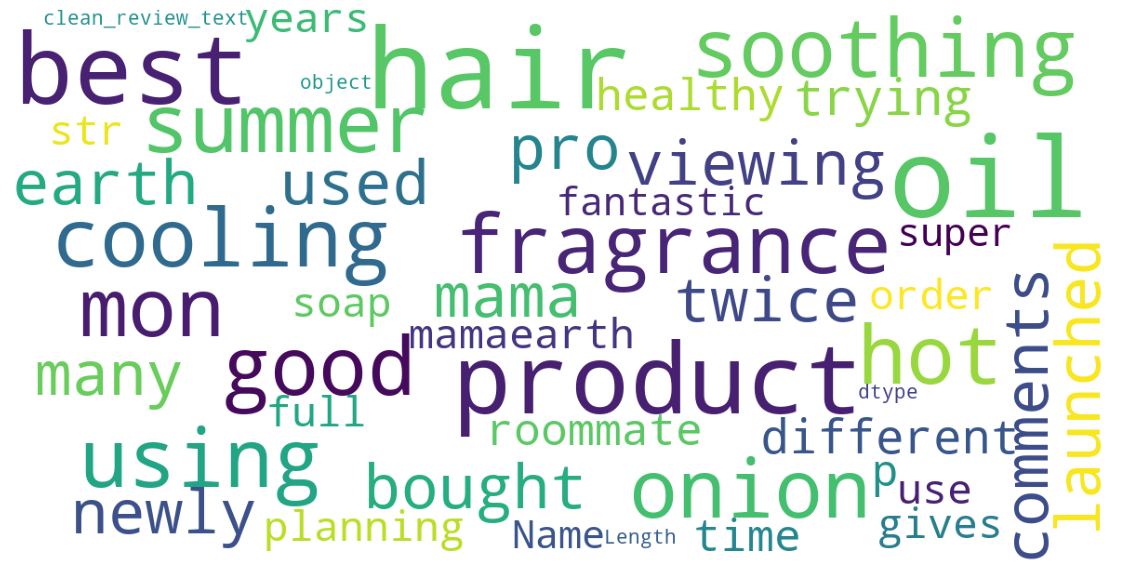

In [23]:
# print wordcloud
positiveReviews_df =reviews_df.loc[reviews_df['scoreStatus'] == "positive"]
show_wordcloud(positiveReviews_df["clean_review_text"])

In [24]:
negativeReviews_df =reviews_df.loc[reviews_df['scoreStatus'] == "negative"]

In [25]:
a = pd.DataFrame(positiveReviews_df.groupby(['brandName']).count()["clean_review_text"])
positiveReviews_df.loc[positiveReviews_df['brandName'] == "Indiana"]["review"]

640    It comes with a delicious taste you can consum...
641    It s a vegetarian products we can also consume...
642    Very good buy of a very good product Best toot...
643    It comes with a delicious taste you can consum...
644    It s a vegetarian products we can also consume...
645    Very good buy of a very good product Best toot...
Name: review, dtype: object

In [26]:
b = pd.DataFrame(negativeReviews_df.groupby(['brandName']).count()["clean_review_text"])

In [27]:
c = pd.concat([a, b], axis=1)
c.columns = ['positiveReviews','negativeReviews']
c

,positiveReviews,negativeReviews
Amul,134,12.0
Britannia,90,18.0
Cinthol,170,20.0
Coca,18,2.0
Dettol,142,22.0
Fastrack,140,16.0
Glucon,14,2.0
Godrej,150,48.0
Himalaya,158,38.0
Indiana,6,NaN


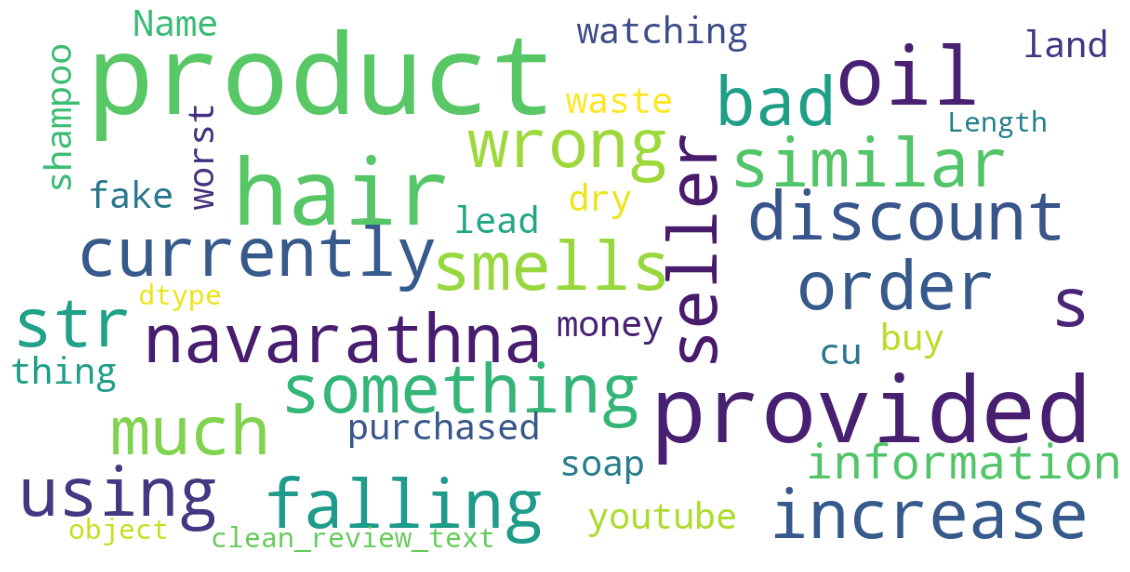

In [28]:
## print wordcloud
negativeReviews_df =reviews_df.loc[reviews_df['scoreStatus'] == "negative"]
show_wordcloud(negativeReviews_df["clean_review_text"])

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
features = CountVectorizer()
features.fit(reviews_df["clean_review_text"])
print(len(features.vocabulary_))
print(features.vocabulary_)

4687
{'bought': 615, 'hair': 1916, 'oil': 2879, 'viewing': 4476, 'many': 2541, 'good': 1842, 'comments': 917, 'product': 3235, 'enough': 1454, 'first': 1645, 'expensive': 1521, 'second': 3650, 'thing': 4207, 'amount': 322, 'low': 2479, 'half': 1925, 'bottle': 611, 'yes': 4671, 'completely': 946, 'filled': 1628, 'cheating': 805, 'customers': 1097, 'mamaearth': 2526, 'trust': 4335, 'fool': 1690, 'people': 3044, 'know': 2302, 'brand': 626, 'going': 1837, 'buy': 698, 'thumbs': 4235, 'onion': 2898, 'used': 4421, 'mama': 2525, 'earth': 1391, 'newly': 2783, 'launched': 2338, 'twice': 4352, 'must': 2747, 'say': 3612, 'im': 2100, 'already': 301, 'impressed': 2111, 'results': 3513, 'prevents': 3202, 'loss': 2461, 'helps': 1991, 'control': 1009, 'premature': 3181, 'greying': 1883, 'dryness': 1368, 'dandruff': 1122, 'scalp': 3616, 'eruptions': 1472, 'problems': 3227, 'regular': 3432, 'use': 4420, 'avoid': 440, 'dry': 1366, 'frizzy': 1749, 'make': 2514, 'sure': 4074, 'hairs': 1922, 'week': 4559, 'o

In [30]:
bagofWords = features.transform(reviews_df["clean_review_text"])
print(bagofWords)

  (0, 322)	1
  (0, 611)	2
  (0, 615)	1
  (0, 626)	2
  (0, 698)	1
  (0, 805)	1
  (0, 917)	1
  (0, 946)	1
  (0, 1097)	1
  (0, 1454)	2
  (0, 1521)	1
  (0, 1628)	1
  (0, 1645)	1
  (0, 1690)	1
  (0, 1837)	1
  (0, 1842)	3
  (0, 1916)	1
  (0, 1925)	1
  (0, 2302)	1
  (0, 2479)	1
  (0, 2526)	2
  (0, 2541)	1
  (0, 2879)	3
  (0, 2898)	1
  (0, 3044)	1
  :	:
  (2772, 1586)	1
  (2773, 1135)	1
  (2773, 1742)	1
  (2773, 2327)	1
  (2773, 2442)	1
  (2773, 4227)	1
  (2774, 3180)	1
  (2774, 3835)	1
  (2776, 3235)	1
  (2776, 4055)	1
  (2777, 536)	1
  (2777, 1023)	1
  (2777, 1178)	1
  (2777, 1366)	1
  (2777, 1720)	1
  (2777, 2052)	2
  (2777, 2068)	1
  (2777, 2091)	1
  (2777, 2360)	1
  (2777, 2708)	2
  (2777, 3438)	1
  (2777, 3798)	1
  (2777, 3835)	1
  (2777, 3874)	1
  (2777, 4048)	2


In [31]:
print(bagofWords.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
print(features.get_feature_names())

['00', '01', '02', '03', '06', '07', '08', '09', '10', '100', '1000', '100grm', '100ml', '1020rs', '1025rs', '109', '10calories', '10days', '10ltrs', '10thickness', '11', '110', '119', '12', '120', '120rs', '1234', '125', '1256', '125g', '127rs', '13', '130', '1300', '14', '140', '140rs', '1499', '15', '1500', '1500ml', '150gm', '150gms', '151', '153', '15th', '16', '160', '165', '165rs', '168', '16k', '170', '171310', '173', '175rs', '18', '182', '185', '188rs', '18best', '18exp', '18i', '18made', '19', '190', '195', '199', '1995', '1kg', '1month', '1st', '1time', '1whole', '1yr', '20', '200', '20000', '200g', '200it', '200ml', '2015', '2016', '2017', '2018', '2019', '2020', '2022', '21', '210', '216', '21600', '22', '220', '23', '230', '2395', '23march', '24', '24x7', '25', '250', '2500rs', '26july', '27', '28', '29th', '2k', '2months', '2nd', '2pcs', '2weeks', '2years', '30', '300', '3000', '30days', '30ml', '31', '310', '315', '320', '325', '347', '355', '365', '385', '3daz', '3rd'

In [33]:
from sklearn.model_selection import train_test_split
df = pd.concat([positiveReviews_df,negativeReviews_df])
df = df[["clean_review_text","scoreStatus"]]
df['scoreStatus'] = (df['scoreStatus'] == 'positive')*1
X = df["clean_review_text"]
y = df["scoreStatus"]
X= features.fit_transform(X)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [34]:
#X_train = features.fit_transform(X_train)
#X_test = features.transform(X_test)

In [35]:
X_train.shape

(1790, 4574)

In [36]:
X.shape

(2558, 4574)

In [37]:
y.shape

(2558,)

In [38]:
X_test.shape

(768, 4574)

In [39]:
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(LogisticRegression(),X,y,cv=5)
#print(np.mean(scores))

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [41]:
model.fit(X_train,y_train)

LogisticRegression()

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
Folds = KFold(n_splits=10)
result = cross_val_score(model,X,y,cv=Folds)
print("These are the results \n",result)

These are the results 
 [0.9453125  0.953125   0.9453125  0.96875    0.9765625  0.8828125
 0.9765625  0.9765625  0.60784314 0.07843137]


In [43]:
#from sklearn.metrics import confusion_matrix , classification_report
#print(classification_report(y_test,y_predicted))

In [44]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 99,  11],
       [  2, 656]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       110
           1       0.98      1.00      0.99       658

    accuracy                           0.98       768
   macro avg       0.98      0.95      0.96       768
weighted avg       0.98      0.98      0.98       768



In [46]:
text = "the product great"
model.predict(features.transform([text]))[0]

1

In [47]:
text = "bad"
model.predict(features.transform([text]))[0]

0

In [48]:
text = "sucks"
model.predict(features.transform([text]))[0]

1

In [49]:
text = "very bad"
model.predict(features.transform([text]))[0]

0

In [50]:
text = "not good"
model.predict(features.transform([text]))[0]

1

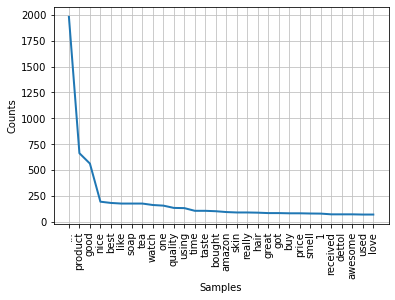

In [51]:
from nltk.corpus import brown
from nltk import FreqDist

tokenized_word=word_tokenize((reviews_df['clean_review_text'].to_string()))
#Frequency Distribution
fdist = FreqDist(tokenized_word)
# Frequency Distribution Plot
fdist.plot(30,cumulative=False)
plt.show()

##### Text Analytics with spacy

In [52]:
# import spacy
# import en_core_web_sm
# nlp = en_core_web_sm.load()


In [53]:
# nlp=spacy.load("en_core_web_sm")

In [54]:
# text = reviews_df['review'][1130]
# doc=nlp(text)
# type(doc)
# print(doc)

In [55]:
# #Tokens
# for token in doc:
#     print(token.text)

In [56]:
# #Stopwords
# stopwords=spacy.lang.en.stop_words.STOP_WORDS
# stopWords = list(stopwords)
# len(stopWords)

In [57]:
# for token in doc:
#     if token.is_stop == False:
#         print(token)

In [58]:
# print(len(doc))
# doc2=[]
# for token in doc:
#     if not token.is_stop:
#         doc2.append(token)
# print(len(doc2))

In [59]:
# #lemmatization
# for review_text in doc:
#     print(review_text.text,review_text.lemma_)

In [60]:
# #POS
# for token in doc:
#    print(token,token.tag_,token.pos_,spacy.explain(token.tag_))

In [61]:
# displacy.render(doc,style='dep',jupyter=True,options={'distance':90})

In [62]:
# for entity in doc.ents:
#     print(entity.text,'---->',entity.label_)
# displacy.render(doc,style='ent',jupyter=True)

In [63]:
# #word vectors and similarity
# #large pre trained model
# !python -m spacy download en_core_web_lg

In [64]:
# import en_core_web_lg
# nlp = en_core_web_lg.load()
# doc=nlp(text)
# for token in doc:
#     print(token.text,'---->',token.has_vector)

In [65]:
# for token in doc:
#     print(token.text,'',token.vector_norm)

In [66]:
# #similarity score
# text="eat"
# text1="ate"
# doc=nlp(text)
# doc1=nlp(text1)
# doc.similarity(doc1)

In [67]:
# #similarity score
# text="good"
# text1="bad"
# doc=nlp(text)
# doc1=nlp(text1)
# doc.similarity(doc1)

In [68]:
# #similarity score
# text="hot"
# text1="summer"
# doc=nlp(text)
# doc1=nlp(text1)
# doc.similarity(doc1)

In [69]:
# #similarity score
# text="excellent"
# text1="good"
# doc=nlp(text)
# doc1=nlp(text1)
# doc.similarity(doc1)

In [70]:
# #similarity score
# text="sucks"
# text1="bad"
# doc=nlp(text)
# doc1=nlp(text1)
# doc.similarity(doc1)

In [71]:
# df = pd.concat([positiveReviews_df,negativeReviews_df])
# df = df[["clean_review_text","scoreStatus"]]
# df['scoreStatus'] = (df['scoreStatus'] == 'positive')*1

In [72]:
# #Tokenization
# punct = string.punctuation
# print(punct)
# def cleanText(sent):
#     doc = nlp(sent)
#     tokens = []
#     for token in doc:
#         if token.lemma != "-PRON-":
#             tokens.append(token.lemma_.lower().strip())
#         else:
#             tokens.append(token.lemma_)
            
#     cleanTokens = []
#     for token in tokens:
#         if token not in stopWords and token not in punct:
#             cleanTokens.append(token)
#     return cleanTokens

In [73]:
# #TFIDF
# tfidf = TfidfVectorizer(tokenizer = cleanText)
# classifier = LinearSVC()
# X = df["clean_review_text"]
# y = df["scoreStatus"]
# X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [74]:
# X_train.shape, X_test.shape

In [75]:
# clf = Pipeline([('tfidf',tfidf),('clf',classifier)])
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)

In [76]:
# print(classification_report(y_test,y_pred))

In [77]:
# confusion_matrix(y_test,y_pred)

With TextBlob

In [78]:
# nltk.download('averaged_perceptron_tagger')
# blob = TextBlob(str(reviews_df['review']))
# pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
# pos_df = pos_df.pos.value_counts()[:20]
# pos_df.iplot(
#     kind='bar',
#     xTitle='POS',
#     yTitle='count', 
#     title='Top 20 Part-of-speech tagging for review corpus')


In [79]:
# pol = lambda x: TextBlob(x).sentiment.polarity
# sub = lambda x: TextBlob(x).sentiment.subjectivity
# reviews_df["polarity"] = reviews_df["review"].apply(pol)
# reviews_df["subjectivity"] = reviews_df["review"].apply(sub)

In [80]:
# #distribution of rating
# sns.countplot(x='rating', data=reviews_df)

In [81]:
# reviews_df.head()

In [82]:
# print("negative reviews")
# most_negative = reviews_df[reviews_df.polarity == -1].review.head()
# print(most_negative)
# print("positive reviews")
# most_positive = reviews_df[reviews_df.polarity == 1].review.head()
# print(most_positive)

Text analysis with gensim and word2vec

In [83]:
# sentences = reviews_df['review_tokens'][10:20]
# sentences

In [84]:
# #train model
# model = Word2Vec(sentences, min_count=1)
# print(model)

In [85]:
# #vocab
# words=list(model.wv.vocab)
# print(words)

In [86]:
# #nltk.download('punkt')
# reviewsText = reviews_df.clean_review_text.values
# reviewsVec = [nltk.word_tokenize(review) for review in reviewsText]
# len(reviewsVec)

In [87]:
# model = Word2Vec(reviewsVec,min_count=1, size=32)
# model.most_similar('soothing')

In [88]:
# model = Word2Vec(reviewsVec,min_count=1, size=32)
# model.most_similar('packaging')

In [89]:
!pip install gensim
